Equation to simulate:

```math
    dS = S*(\frac{3}{1300} + 0.2dX)
```

where $dX \sim N(0,\frac{1}{\sqrt{52}}^2)$ and $S$ is the value of the underlying. Initial condition $S_0 = 100$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Initial condition
S = [100]
timesteps = 51
# delta change
delta_x = np.random.normal(0,1/(52)**0.5, timesteps)

for i in range(len(delta_x)):
    S_prev = S[-1]
    S_change = S_prev * (3/1300 + 0.2*delta_x[i])
    S.append(S_prev + S_change)

print(S)

[100, 98.86881278364551, 98.46949809376585, 100.64231372117881, 101.38990277940378, 101.39440365922837, 99.02361236744719, 99.86528385228738, 98.3270140636755, 98.27433789506708, 99.49987629796152, 101.36065227252517, 98.36932690723637, 94.52956307155213, 96.06800659224129, 92.77978723319119, 90.05293896032433, 90.38390855642119, 86.68206371356675, 85.09079133037274, 84.61171632512666, 84.25671946172314, 83.38802294586219, 87.86562733129331, 87.83454529852263, 89.64859872819561, 88.42539901625885, 88.7353556691458, 88.89345690268857, 89.89996202372154, 89.43920552294142, 82.48658148849078, 78.70698362812583, 76.6579066545245, 74.23870426207398, 75.72180073832547, 75.88131299656888, 75.2015487499767, 75.40307485431055, 74.83498709169906, 72.24139311875035, 71.43506189981295, 69.63022191602242, 69.53715582492592, 71.97645900056915, 74.23559059087088, 73.00907870883799, 70.91248023514441, 70.66927342423112, 73.45489366887726, 76.24850085155283, 80.38274978288021]


In [3]:
# Compile results into a dataframe
df_results = pd.DataFrame({'S': S})
df_results[['R_raw']] = df_results[['S']].diff() 
df_results[['R_pct']] = df_results[['S']].pct_change()

R_pct_mean = float(df_results[['R_pct']].mean())
R_pct_std = float(df_results[['R_pct']].std())

print(f'Percentage return mean is {R_pct_mean}, standard deviation is {R_pct_std}')

Percentage return mean is -0.003943573917486003, standard deviation is 0.025843471363458454


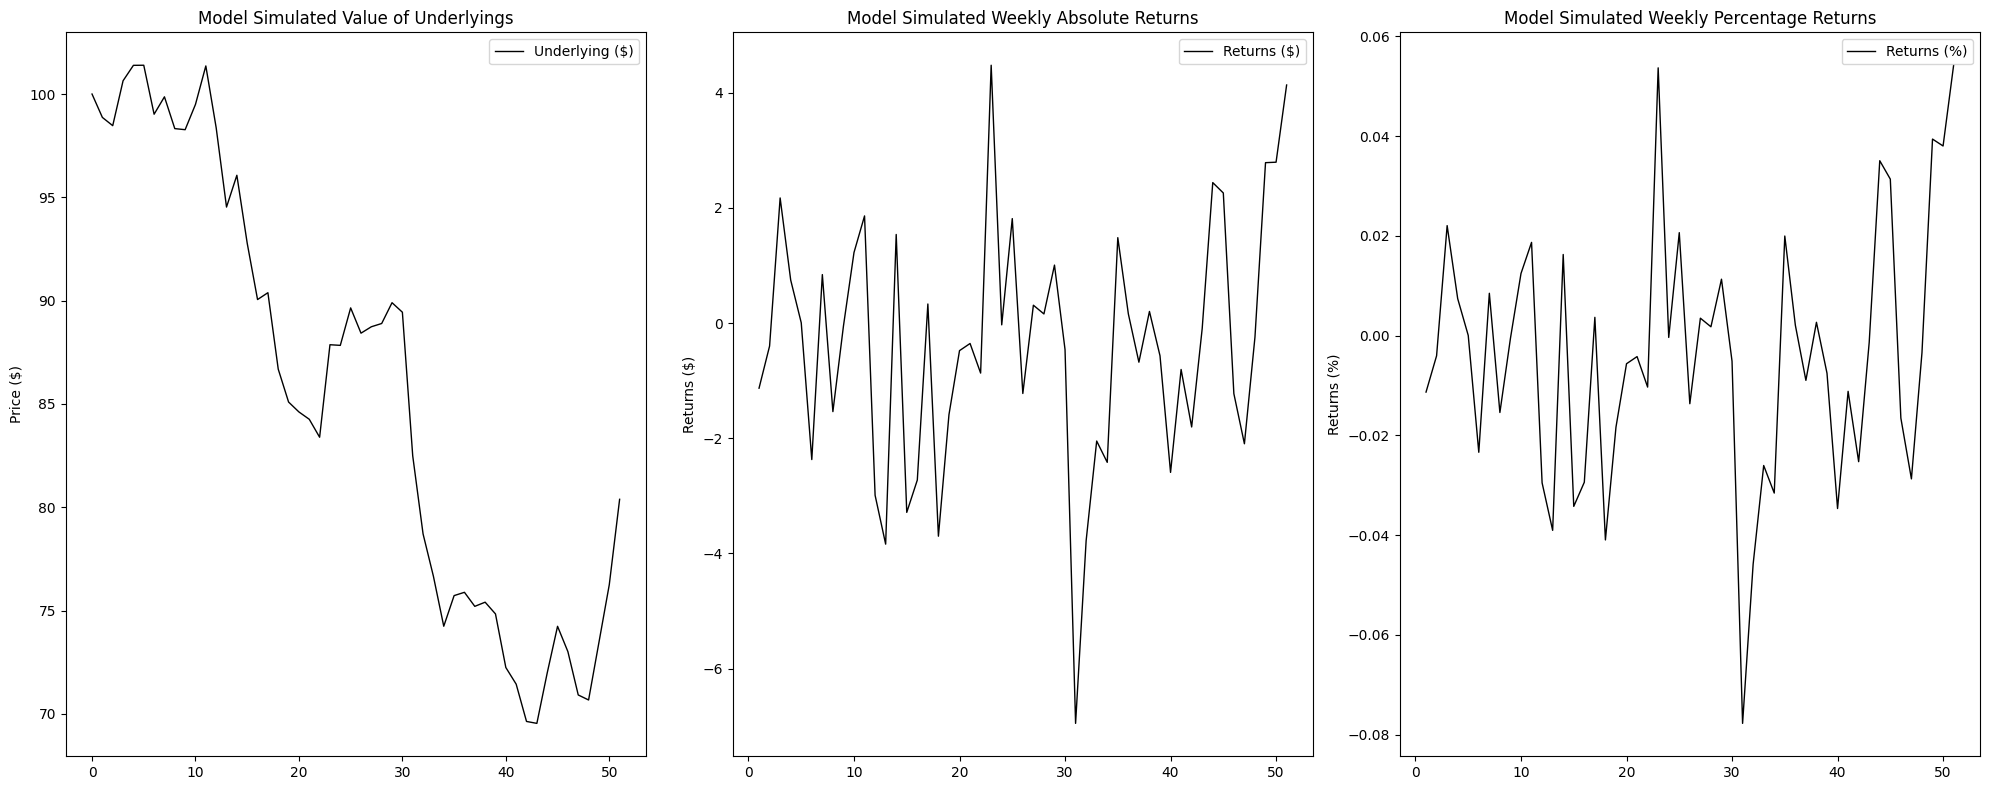

In [4]:
# Plot the Change in prices
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))

# Plot timeseries change of the value of the underlying
ax1.plot(df_results.S, label = 'Underlying ($)', color='black', linewidth=1)
ax1.set_title('Model Simulated Value of Underlyings')
ax1.set_ylabel('Price ($)')
ax1.grid(False)
ax1.legend()

# Plot weekly returns
ax2.plot(df_results.R_raw, label = 'Returns ($)', color='black', linewidth=1)
ax2.set_title('Model Simulated Weekly Absolute Returns')
ax2.set_ylabel('Returns ($)')
ax2.grid(False)
ax2.legend()

# Plot weekly percentage returns
ax3.plot(df_results.R_pct, label = 'Returns (%)', color='black', linewidth=1)
ax3.set_title('Model Simulated Weekly Percentage Returns')
ax3.set_ylabel('Returns (%)')
ax3.grid(False)
ax3.legend()

plt.tight_layout()
plt.show()